<a href="https://colab.research.google.com/github/machine-perception-robotics-group/MPRGDeepLearningLectureNotebook/blob/master/01_dnn_scratch/Perceptron_AND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 単純パーセプトロンによるAND回路の作成

---

単純パーセプトロンでAND出力ができるように学習してみよう！

まずはライブラリ（numpyとmatplotlib）をimportし、入力データxとその教師ラベルy_trainを設定します．

In [117]:
import numpy as np
import matplotlib.pyplot as plt


In [118]:
# 入力データと教師ラベル
x = np.asarray([[0,0],[1,0],[0,1],[1,1]], dtype=np.float64)
y_train = np.asarray([0, 0, 0, 1], dtype=np.float64)

print(x) #AND gate input
print(y_train) # answer


[[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
[0. 0. 0. 1.]


## ネットワークモデルの定義
単純パーセプトロンを定義します．

まずはじめに，ネットワークの定義に必要なシグモイド関数を定義します．

In [119]:
# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)


上で定義したシグモイド関数を用いてネットワークモデルを作成します．
ここでは，入力層，出力層から構成される単純パーセプトロンを定義することとし，1サンプルのデータを入力して結果を出力するようなネットワークを定義します．

入力層のユニット数は引数として与え，`input_size`とします．
そして，`__init__`関数を用いて，ネットワークのパラメータを初期化します．
`w`は重みで，`b`はバイアスを表しています．
重みは`randn`関数で，標準正規分布に従った乱数で生成した値を保有する配列を生成します．
バイアスは`zeros`関数を用いて，要素が全て0の配列を生成します．

そして，`forward`関数で，データを入力して結果を出力するための演算を定義します．

次に，`backward`関数ではパラメータの更新量を計算します．
まず，ネットワークの出力結果と教師ラベルから，誤差`dy`を算出します．
その後，勾配を計算し，パラメータの更新量を`self.grads`へ保存しておきます．

また，`update_parameters`関数で，更新量をもとにパラメータの更新を行う関数を定義します．ここでは，`backward`関数によって計算した勾配と更新量（`lr`）によって，現在のパラメータを更新します．


In [120]:
# 単純パーセプトロンの定義
class Perceptron:

    def __init__(self, input_size, w_std=0.01):
        self.w = w_std * np.random.randn(input_size, 1)
        self.b = 0.0   
        self.grads = {}

    def forward(self, x):
        self.h = np.dot(x, self.w) + self.b
        self.y = sigmoid(self.h)
        return self.y

    def backward(self, x, t): 
        self.grads = {}

        d_h = -1 * (t - self.y) * sigmoid_grad(self.h)
        self.grads['w'] = np.dot(x.T, d_h)
        self.grads['b'] = np.sum(d_h, axis=0)

    def update_parameters(self, lr):
        self.w -= lr * self.grads['w']
        self.b -= lr * self.grads['b']


入力層２（`input_size = 2`）となるMLPのモデルを作成します。
重みとバイアスの初期値を設定する際に、標準偏差1.0（`w_std=1.0`）の乱数を設定します。
定義した`display_model_parameters`関数により初期値を表示して，重みとバイアスのそれぞれの値を確認しましょう．

In [121]:
# モデルのパラメータを表示
def display_model_parameters(model):
  print("w:", model.w, "b:", model.b)

# モデルの作成
input_size = 2
model = Perceptron(input_size=input_size, w_std=1.0)

# モデルパラメータの初期値を表示
display_model_parameters(model)


w: [[ 0.88409233]
 [-0.63266758]] b: 0.0


## 単純パーセプトロンの学習
作成したネットワークを用いて，学習を行います．
ここでは1サンプルずつデータを入力た場合のその出力結果と教師ラベルから誤差を算出し，パラメータの更新を行います．

各更新において，学習用データと教師データをそれぞれ`input`と`label`とします．
学習モデルに`input`を与えて，分類結果である`y_pred`を取得します．
取得した`y_pred`は精度および誤差を算出するための関数へと入力され，値を保存します．
次に，誤差を`backward`関数で逆伝播し，`update_parameters`でネットワークの更新を行います．

In [122]:
# 学習パラメータの設定
num_train_data = 4
epoch_num = 500
learning_rate = 1.0

epoch_list = []
train_loss_list = []
train_accuracy_list = []

iteration = 0
for epoch in range(1, epoch_num + 1, 1):
    sum_loss = 0.0
    
    for i in range(0, num_train_data, 1):
        input = x[i:i+1]
        label = y_train[i:i+1]

        y_pred = model.forward(input)

        sum_loss += np.sum(np.power(y_pred - label, 2))

        model.backward(input, label.reshape(-1, 1))
        model.update_parameters(lr=learning_rate)
    
    # 学習途中のlossの保存
    epoch_list.append(epoch)
    train_loss_list.append(sum_loss)
    print("epoch: {}, loss: {}".format(epoch, sum_loss))

# モデルのパラメータを表示
display_model_parameters(model)


epoch: 1, loss: 1.1233386697001897
epoch: 2, loss: 1.0377002876474601
epoch: 3, loss: 0.9648390586393366
epoch: 4, loss: 0.9028076735294108
epoch: 5, loss: 0.8496609528964978
epoch: 6, loss: 0.8035862290195086
epoch: 7, loss: 0.7630646249235687
epoch: 8, loss: 0.7269285910032202
epoch: 9, loss: 0.6943285061707047
epoch: 10, loss: 0.6646586652282522
epoch: 11, loss: 0.6374816451832953
epoch: 12, loss: 0.6124693176442644
epoch: 13, loss: 0.5893636354479502
epoch: 14, loss: 0.5679530738506968
epoch: 15, loss: 0.5480590732613714
epoch: 16, loss: 0.5295280407961604
epoch: 17, loss: 0.5122262382060827
epoch: 18, loss: 0.4960362106154961
epoch: 19, loss: 0.4808541387266657
epoch: 20, loss: 0.46658781633353996
epoch: 21, loss: 0.45315507623763895
epoch: 22, loss: 0.4404825379354216
epoch: 23, loss: 0.42850458219990106
epoch: 24, loss: 0.41716248463927963
epoch: 25, loss: 0.4064036630177734
epoch: 26, loss: 0.39618101028193115
epoch: 27, loss: 0.38645229677739423
epoch: 28, loss: 0.377179632078

## 学習推移のグラフ化

上の学習プログラムで保存しておいた誤差をグラフ化します．


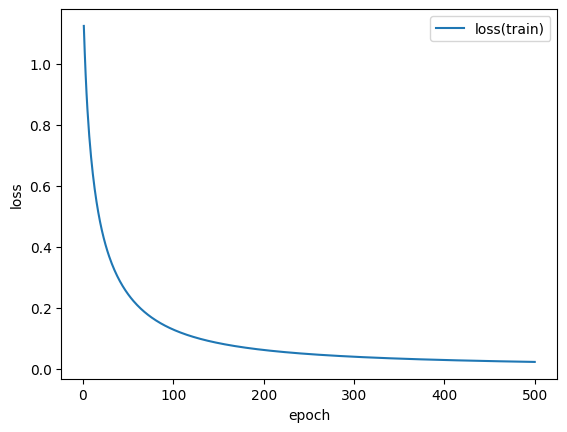

In [123]:
plt.figure()
plt.plot(epoch_list, train_loss_list, label='loss(train)')
plt.xlabel("epoch")     # x軸ラベル
plt.ylabel("loss")      # y軸ラベル
plt.legend()            # 凡例
plt.show()


# 出力の表示
x1とx2の値を生成し，出力結果を可視化します．

**作成した図の保存**

`plt.savefig("保存ファイル名.pdf")`を実行することで，作成した図をファイルとして保存することができます．
この時，ファイル名の拡張子を`.png`や`.jpg`などにすることで，任意のファイルフォーマットで図を保存することができます．
レポートや論文，スライドに使用する図を作成する場合は，ベクタ画像のPDFで保存することをお勧めします．

**Google Colab.上で作成した図のダウンロード**

Google Colab.上で実行している場合，画面左側のフォルダアイコン部分をクリックすることで，Colab.上のファイルを閲覧することが可能となります．
ファイル名右側の「$\vdots$」アイコンをクリックし，ダウンロードを選択することで，作成したPDFを自身のPCへダウンロードすることができます．

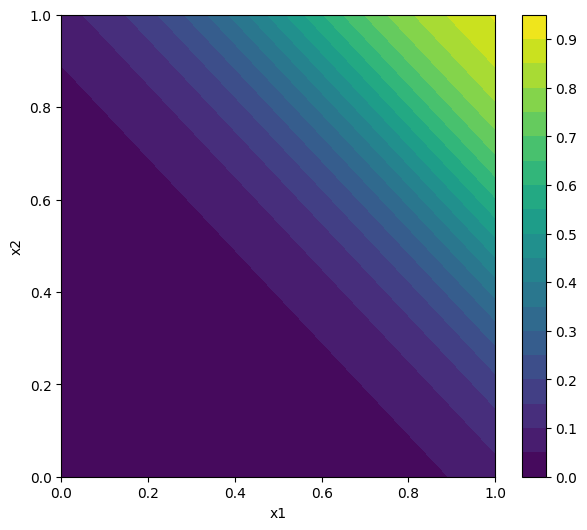

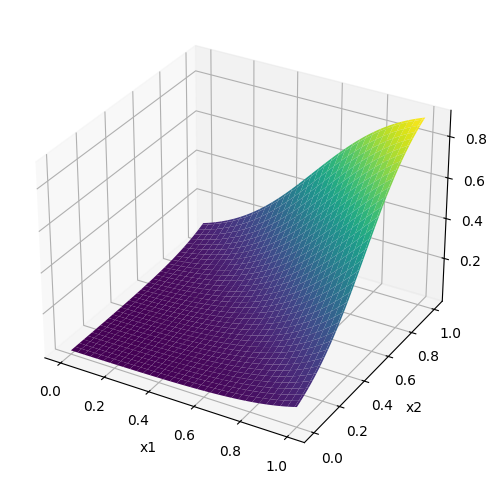

In [124]:
# x1とx2の生成
x1 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
x2 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
X1, X2 = np.meshgrid(x1, x2)

# 入力x1とx2の出力を計算しvalに代入
val = []

for v in x2:
  for u in x1:
    input = u, v
    val.append(model.forward(input))

val = np.asarray(val)
val = val.reshape(X1.shape)

# 等高線表示(PDFにセーブ)     
fig, ax = plt.subplots(figsize=(7,6))
surf = ax.contourf(X1, X2, val, 20, cmap='viridis')
fig.colorbar(surf)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.savefig("Perceptron-2D.png")
plt.show()

# 3D表示 (PDFにセーブ)  
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, val, cmap='viridis') 
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.savefig("Perceptron-3D.png")
plt.show()


## 課題
1. 学習率 lr の値を変更すると， 学習曲線と重みがどのように変更するか試してみよう
2. バイアス b をbackwardの際に更新しないように変更し学習できるか試してみよう
2. ORの出力を学習するように変更してみよう
3. XORを学習するように変更してみよう
4. 0000~1111を入力し、10進数の値を学習するように変更してみよう
   （input_size = 4, num_train_data = 16）


In [125]:
lr_list = [0.9999,1.0,1.1]


In [126]:
# 学習パラメータの設定
lr_1 = lr_list[0]

epoch_list = []
train_loss_list_1 = []
train_accuracy_list = []

iteration = 0
for epoch in range(1, epoch_num + 1, 1):
    sum_loss = 0.0
    
    for i in range(0, num_train_data, 1):
        input = x[i:i+1]
        label = y_train[i:i+1]

        y_pred = model.forward(input)

        sum_loss += np.sum(np.power(y_pred - label, 2))

        model.backward(input, label.reshape(-1, 1))
        model.update_parameters(lr = lr_1)
    
    # 学習途中のlossの保存
    epoch_list.append(epoch)
    train_loss_list_1.append(sum_loss)
    print("epoch: {}, loss: {}".format(epoch, sum_loss))

# モデルのパラメータを表示
display_model_parameters(model)


epoch: 1, loss: 0.022196243084742984
epoch: 2, loss: 0.022147289302085177
epoch: 3, loss: 0.022098542233895853
epoch: 4, loss: 0.022050000601295673
epoch: 5, loss: 0.022001663135805538
epoch: 6, loss: 0.021953528579240197
epoch: 7, loss: 0.021905595683603615
epoch: 8, loss: 0.02185786321098617
epoch: 9, loss: 0.021810329933462484
epoch: 10, loss: 0.021762994632991035
epoch: 11, loss: 0.021715856101314636
epoch: 12, loss: 0.02166891313986285
epoch: 13, loss: 0.02162216455965498
epoch: 14, loss: 0.021575609181204554
epoch: 15, loss: 0.02152924583442504
epoch: 16, loss: 0.021483073358536657
epoch: 17, loss: 0.02143709060197448
epoch: 18, loss: 0.02139129642229724
epoch: 19, loss: 0.021345689686097832
epoch: 20, loss: 0.021300269268914596
epoch: 21, loss: 0.021255034055143472
epoch: 22, loss: 0.021209982937951753
epoch: 23, loss: 0.021165114819192206
epoch: 24, loss: 0.021120428609318904
epoch: 25, loss: 0.021075923227303426
epoch: 26, loss: 0.021031597600552503
epoch: 27, loss: 0.02098745

In [127]:
# 学習パラメータの設定
lr_2 = lr_list[1]

epoch_list = []
train_loss_list_2 = []
train_accuracy_list = []

iteration = 0
for epoch in range(1, epoch_num + 1, 1):
    sum_loss = 0.0
    
    for i in range(0, num_train_data, 1):
        input = x[i:i+1]
        label = y_train[i:i+1]

        y_pred = model.forward(input)

        sum_loss += np.sum(np.power(y_pred - label, 2))

        model.backward(input, label.reshape(-1, 1))
        model.update_parameters(lr = lr_2)
    
    # 学習途中のlossの保存
    epoch_list.append(epoch)
    train_loss_list_2.append(sum_loss)
    print("epoch: {}, loss: {}".format(epoch, sum_loss))

# モデルのパラメータを表示
display_model_parameters(model)


epoch: 1, loss: 0.010374815443116454
epoch: 2, loss: 0.010363539013672656
epoch: 3, loss: 0.010352286384586976
epoch: 4, loss: 0.01034105748167638
epoch: 5, loss: 0.010329852231062786
epoch: 6, loss: 0.010318670559171548
epoch: 7, loss: 0.010307512392729885
epoch: 8, loss: 0.010296377658765399
epoch: 9, loss: 0.010285266284604458
epoch: 10, loss: 0.010274178197870736
epoch: 11, loss: 0.010263113326483806
epoch: 12, loss: 0.010252071598657472
epoch: 13, loss: 0.010241052942898371
epoch: 14, loss: 0.010230057288004524
epoch: 15, loss: 0.010219084563063776
epoch: 16, loss: 0.010208134697452508
epoch: 17, loss: 0.010197207620833964
epoch: 18, loss: 0.010186303263156936
epoch: 19, loss: 0.010175421554654335
epoch: 20, loss: 0.010164562425841735
epoch: 21, loss: 0.010153725807515933
epoch: 22, loss: 0.010142911630753612
epoch: 23, loss: 0.01013211982690986
epoch: 24, loss: 0.01012135032761683
epoch: 25, loss: 0.010110603064782397
epoch: 26, loss: 0.010099877970588525
epoch: 27, loss: 0.01008

In [128]:
# 学習パラメータの設定
lr_3 = lr_list[2]

epoch_list = []
train_loss_list_3 = []
train_accuracy_list = []

iteration = 0
for epoch in range(1, epoch_num + 1, 1):
    sum_loss = 0.0
    
    for i in range(0, num_train_data, 1):
        input = x[i:i+1]
        label = y_train[i:i+1]

        y_pred = model.forward(input)

        sum_loss += np.sum(np.power(y_pred - label, 2))

        model.backward(input, label.reshape(-1, 1))
        model.update_parameters(lr = lr_3)
    
    # 学習途中のlossの保存
    epoch_list.append(epoch)
    train_loss_list_3.append(sum_loss)
    print("epoch: {}, loss: {}".format(epoch, sum_loss))

# モデルのパラメータを表示
display_model_parameters(model)


epoch: 1, loss: 0.006693437934885142
epoch: 2, loss: 0.006688155606958556
epoch: 3, loss: 0.006682881410430886
epoch: 4, loss: 0.006677615326964098
epoch: 5, loss: 0.0066723573382766604
epoch: 6, loss: 0.006667107426142696
epoch: 7, loss: 0.006661865572391524
epoch: 8, loss: 0.006656631758906854
epoch: 9, loss: 0.006651405967626445
epoch: 10, loss: 0.006646188180541331
epoch: 11, loss: 0.006640978379695602
epoch: 12, loss: 0.0066357765471856504
epoch: 13, loss: 0.006630582665159963
epoch: 14, loss: 0.006625396715818525
epoch: 15, loss: 0.006620218681412559
epoch: 16, loss: 0.006615048544244131
epoch: 17, loss: 0.006609886286665694
epoch: 18, loss: 0.0066047318910798835
epoch: 19, loss: 0.0065995853399391236
epoch: 20, loss: 0.006594446615745423
epoch: 21, loss: 0.006589315701049939
epoch: 22, loss: 0.006584192578452914
epoch: 23, loss: 0.006579077230603249
epoch: 24, loss: 0.006573969640198327
epoch: 25, loss: 0.006568869789983792
epoch: 26, loss: 0.00656377766275333
epoch: 27, loss: 0

In [129]:
label_list = []
for i in range(len(lr_list)):
 label_list.append("lr = %s"%(str(lr_list[i])))

label_list


['lr = 0.9999', 'lr = 1.0', 'lr = 1.1']

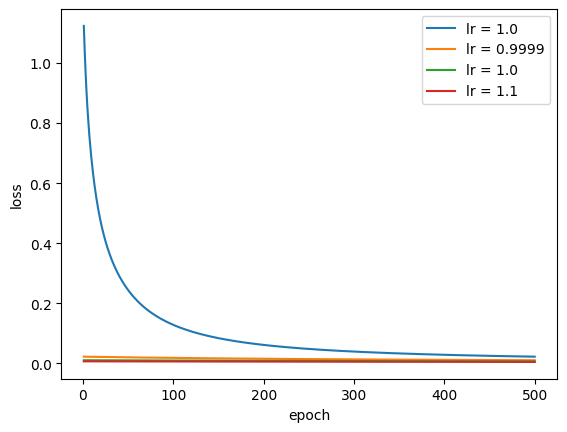

<Figure size 640x480 with 0 Axes>

In [130]:

fig = plt.figure()
#==============================
plt.plot(epoch_list, train_loss_list, label='lr = 1.0')
plt.plot(epoch_list,train_loss_list_1, label = label_list[0])
plt.plot(epoch_list,train_loss_list_2, label = label_list[1])
plt.plot(epoch_list,train_loss_list_3, label = label_list[2])
plt.xlabel("epoch")     # x軸ラベル
plt.ylabel("loss")      # y軸
plt.legend()           
plt.show()
plt.savefig("AND_learning_rate.png")
